In [106]:
import pandas as pd 

In [107]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')

In [108]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [109]:
df.shape

(37249, 2)

In [110]:
df.sample(1)['clean_comment'].values[0]

'this might sound insensitive but ias kids chandigarh have been pulling off this same shit and much worse for years now that the shoe the other foot maybe the girl dad and his peers will understand what everyone else goes through here just one example '

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [112]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [113]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [114]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [115]:
df.dropna(inplace=True)

In [116]:
df.duplicated().sum()

np.int64(350)

In [117]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [118]:
df[(df['clean_comment'].str.strip()=='')]

,clean_comment,category
181,,0
375,,0
392,,0
651,,0
1222,,0
...,...,...
35711,,0
35778,,0
35987,,0
36707,,0


In [119]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [120]:
df.duplicated().sum()

np.int64(350)

In [121]:
df.drop_duplicates(inplace=True)

In [122]:
df.duplicated().sum()

np.int64(0)

In [123]:
df['clean_comment'] = df['clean_comment'].str.lower()

In [124]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [125]:
comments_with_newlinw = df[df['clean_comment'].str.contains('\n')]
comments_with_newlinw

,clean_comment,category
106,pretty sure this sarcasm satire the news 1500...,1
217,lots streams this site vietnam arsenal html\n,0
317,the govt should have only one religion says t...,0
448,what missing jpg\nand why this brilliant edit ...,1
495,you wondering whether girl will get through t...,1
...,...,...
36687,for all the blinkers like was the target audie...,1
36919,y6sg1xuovbb0czfwjpug0h html\nfull credit anti...,1
36933,can the same applied reddit and randimods remo...,0
37048,well isn that nice see looks really good our j...,1


In [126]:
df['clean_comment'] = df['clean_comment'].str.replace('\n',' ',regex=True)

In [127]:
comments_with_newlinw_reamining = df[df['clean_comment'].str.contains('\n')]


EDA

In [128]:
import seaborn as sns 
import matplotlib.pyplot as plt

<Axes: xlabel='category', ylabel='count'>

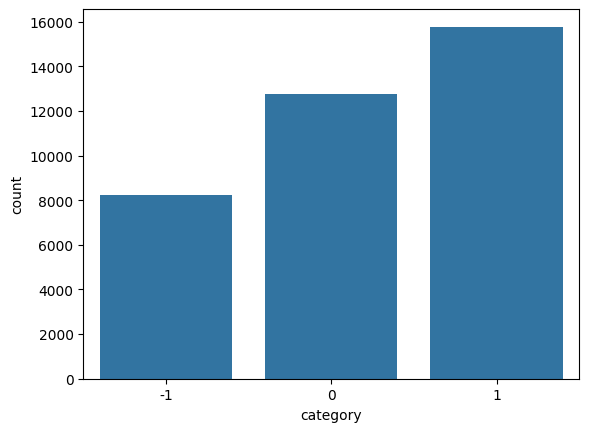

In [129]:
sns.countplot(data=df,x="category")

In [130]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.72
-1    22.42
Name: proportion, dtype: float64

In [131]:
df['word_count']=df['clean_comment'].apply(lambda x: len(x.split()))

In [132]:
df.sample(5)

,clean_comment,category,word_count
36654,anti modi anti india that what this sub has be...,0,10
4622,white areas are regions frequent cloudiness da...,1,134
35267,that little jiggle the end,-1,5
9060,shit this needs sticky,-1,4
34412,time takes full turn,1,4


In [133]:
df['word_count'].describe()

count    36799.000000
mean        29.662627
std         56.787371
min          0.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

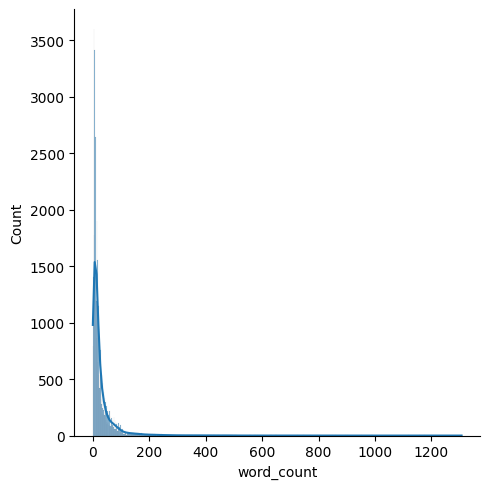

In [134]:
sns.displot(df['word_count'],kde=True)

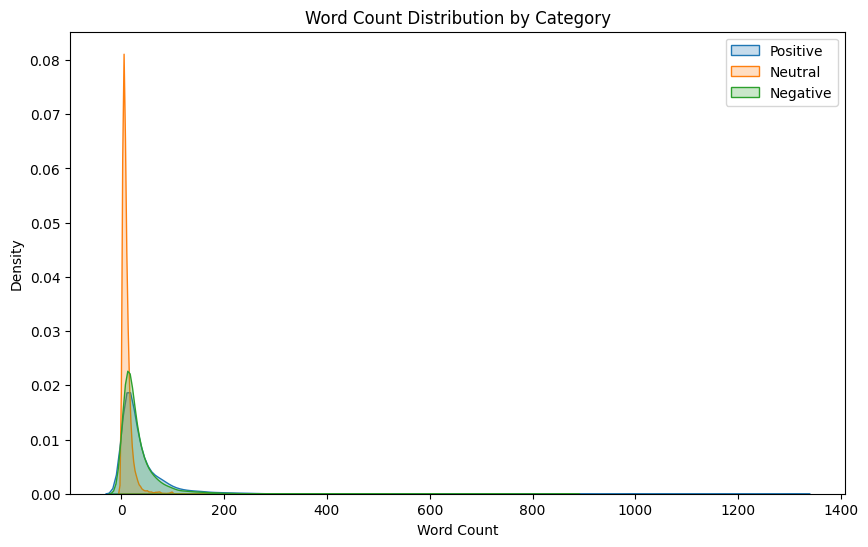

In [135]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()
     


<Axes: ylabel='word_count'>

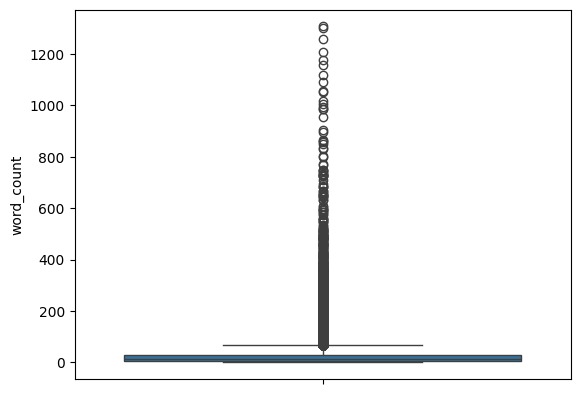

In [136]:
sns.boxplot(df['word_count'])

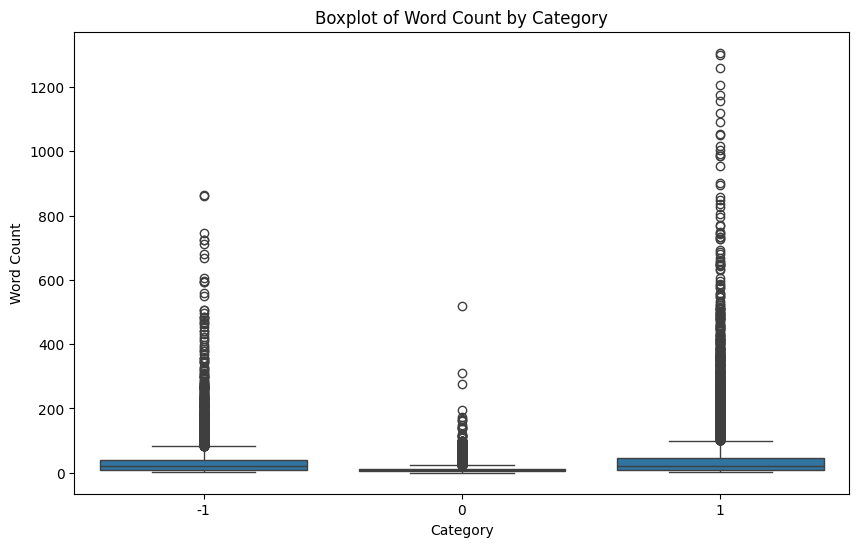

In [137]:

# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()
     

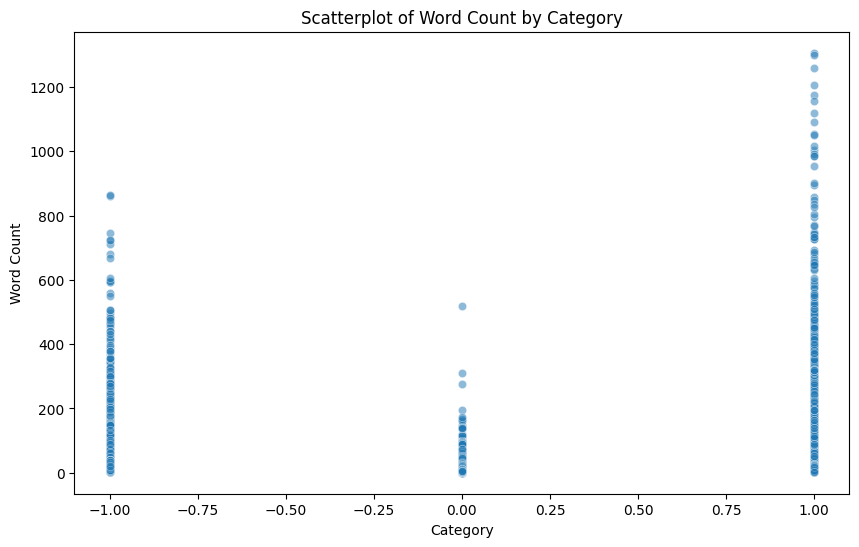

In [138]:

# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()
     


<Axes: xlabel='category', ylabel='word_count'>

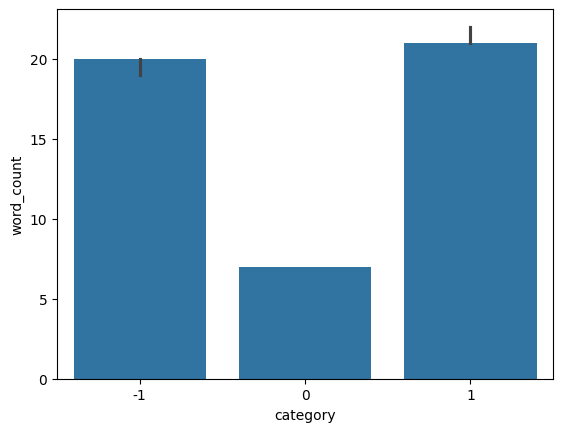

In [139]:
# median word counts among sentiments

sns.barplot(df,x='category',y='word_count',estimator='median')

In [141]:
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [142]:
stop_words = set(stopwords.words('english'))

In [143]:
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

In [144]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
18743,good one with the angela merkel fuhrer germany...,1,9,2
11407,hahahahha,0,1,0
6644,when you say fuck bjp what kind sex you have y...,1,12,6
32330,try teach english online english restrict inst...,0,18,5
36060,don’ vote vote right not duty,1,6,1


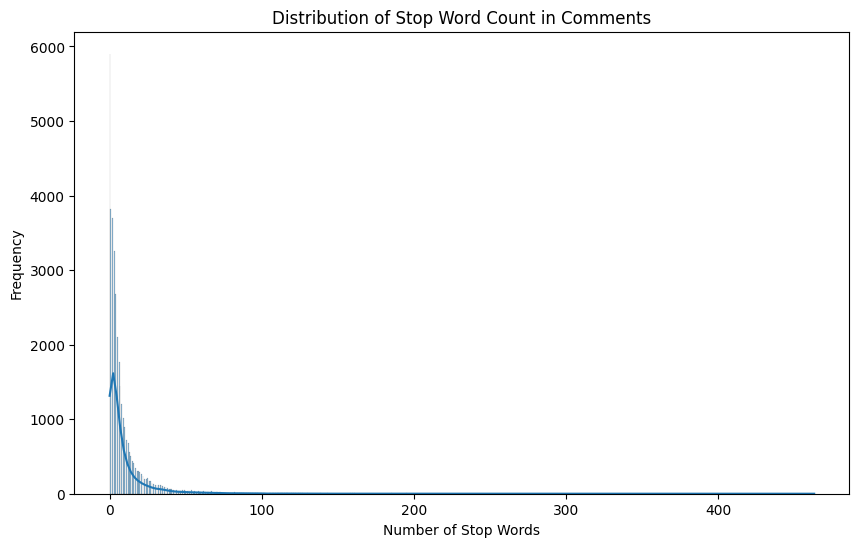

In [145]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

     

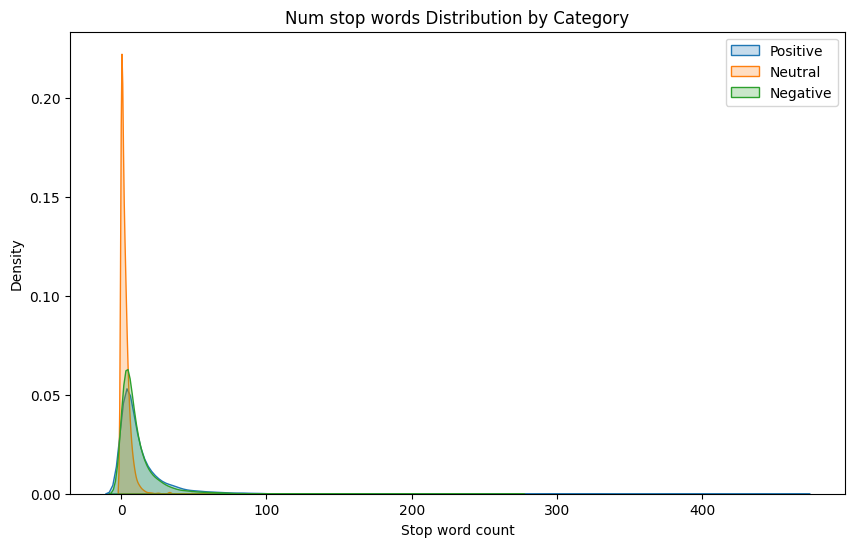

In [146]:

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

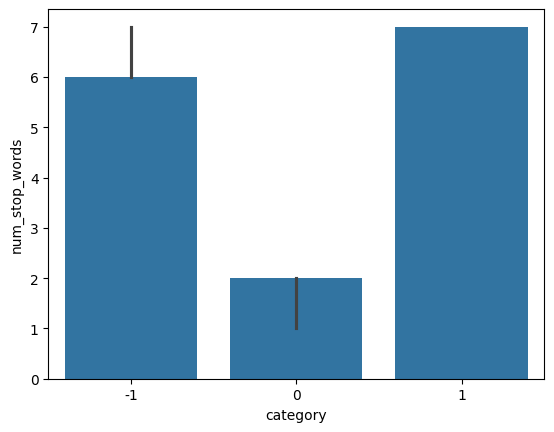

In [147]:
# median word counts among sentiments

sns.barplot(df,x='category',y='num_stop_words',estimator='median')

C:\Users\gaura\AppData\Local\Temp\ipykernel_29348\101498387.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


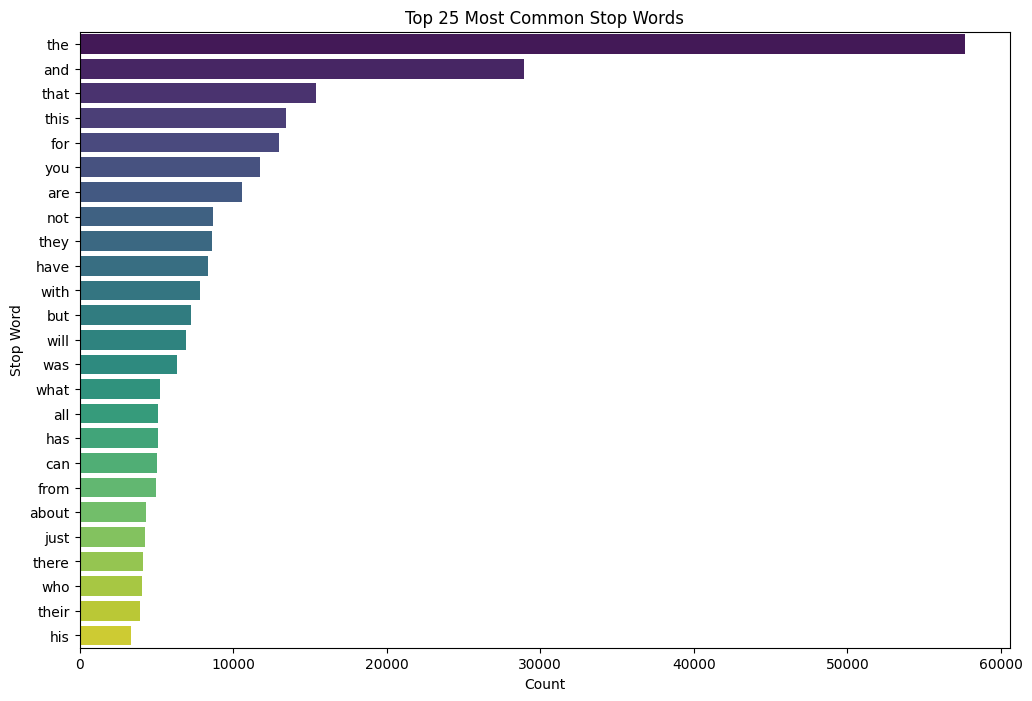

In [148]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()
